# Lissajous Figures

Lissajous Figures arise from the motion of a two-dimensional harmonic oscillator by plotting y vs x, which are independent of each other. These figures can be described by the following equation:

$$\vec{F}_{net}=\langle -k_1x, -k_2y, 0 \rangle$$

The variables $x$ and $y$ are coordinates in the x-y plane and $k$ is the stiffness of the motion in N/m. The stiffnesses can be written as:

$$k=m\omega^2$$

The variable $\omega$ is the angular frequency of the mass ($m$) in the system.

We can then replace the $k$ in the first equation to produce the following equation:

$$\vec{F}_{net}=\langle -m\omega_1^2x, -m\omega_2^2y, 0 \rangle$$

When the angulat frequency ratio $\frac{\omega_1}{\omega_2}$ is equal to a ratio of integers like $1/2$, $1/3$, $2/3$, $2/1$, $3/2$, etc. interesting patterns in a graph of $y(x)$ (the "motion") emerge. 
 
 reference: [All About Lissajous Figures by Thomas Greenslade, Jr.](https://aapt.scitation.org/doi/abs/10.1119/1.2343802?journalCode=pte)
 
Lissajous Figures can be pictured as arrising from a box with a mass in the center of it attached to for springs (one attached to the center of each of the four sides of the box). When you pull the mass with an initial velocity in one direction and then let it go, the Lissajous Figures show the trajectory of the mass that is attached to the springs.

### Solving our Differential Equations Analytically
Before beginning to code anything we must obtain the needed differential equations so that we can use the numericalintegration method to solve them and create the Lissajous Figures. The differential equations we are looking for are $\frac{dx}{dt}$, $\frac{dy}{dt}$, $\frac{dv_x}{dt}$, and $\frac{dv_y}{dt}$

We start out with our initial Equations:
$$\vec{F}_{net}=\langle -k_1x, -k_2y, 0 \rangle$$

$$k = m\omega^2$$

Using the above equations, we can solve for $\frac{dv_x}{dt}$ and $\frac{dv_y}{dt}$:

$$\vec{F}_{netx} = -k_1x$$

$$m \frac{dv_x}{dt} = -k_1x$$

$$\frac{dv_x}{dt} = \frac{-k_1x}{m}$$

$$\frac{dv_x}{dt} = \frac{m\omega^2x}{m}$$

$$\boxed{\frac{dv_x}{dt} = \omega^{2}x}$$


$$\vec{F}_{nety} = -k_1xy$$

$$m \frac{dv_y}{dt} = -k_1y$$

$$\frac{dv_y}{dt} = \frac{-k_1y}{m}$$

$$\frac{dv_y}{dt} = \frac{m\omega^2y}{m}$$

$$\boxed{\frac{dv_y}{dt} = \omega^{2}y}$$

For the next two differential equations, we know that:
$$\boxed{\frac{dx}{dt} = v_x}$$

$$\boxed{\frac{dy}{dt} = v_y}$$

Now that we have our 4 differential equations, we can continue on to the coding part.

### Import Necessary Packages

we need to first import `numpy` and `matplotlib` to produce the Lissajous Figures.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define Constants

We need to define 3 constants to be able to create these figures... the mass ($m$), angular frequency in the x-direction |($w_1$), and the angular frequency in the y-direction ($w_2$).

In [4]:
# define constants
m = 1   # kg
w1 = 1  # angular frequency of x (rad/s)
w2 = 2  # angular frequency of y (rad/s)

### Create the Differential Equation Solver

In [5]:
def RK4(diffeq, y0, t, h):
    k1 = h*diffeq(y0, t)                    # dy/dt at t
    k2 = h*diffeq(y0+0.5*k1, t + h/2.)      # dy/dt at t+h/2
    k3 = h*diffeq(y0+0.5*k2, t + h/2.)      # dy/dt at t+h/2
    k4 = h*diffeq(y0+k3, t + h)             # dy/dt at t+h
    return y0 + (k1+k4)/6.0 + (k2+k3)/3.0


### Creat the Model Function
The model function is where the differential equations themselves are coded in. They will be ran through the differential equation solver (called RK4) to calculated the values for each time step.

In [6]:
# define model function
def lissajous(y0, t):
    dydt = np.zeros(4) #initialize array; each element is a derivative of y0 = [xpos, ypos, vx, vy, ...]
    dydt[0] = y0[2] # intake x position; y[0] is position y[1] is dy/dt (intakes the derivative of the xpos and returns vx)
    dydt[1] = y0[3] # intakes y position;
    dydt[2] = -w1**2*y0[0] # intakes vx and returns x acceleration
    dydt[3] = -w2**2*y0[1] # intakes vy and returns y acceleration
    return dydt #this updates the dydt in the integrater function

### Define the Initial Conditions

The initial conditions for our Lissajous Figure are: initial x-position (`rx0`), initial y-position (`ry0`), initial x-velocity (`vx0`), initial y-velocity (`vy0`), and time (`t`). The variable `h` is the time step for the differential equations. You can choose these initial conditions to be whaterver you would like them to be. These initial conditions will be run through the differenial equation function to progress our equations for each time step `h`.

In [7]:
rx0 = 0   #initial x-position (m)
ry0 = 0   #initial y-position (m)
vx0 = 5   #initial x-velocity (m/s)
vy0 = 5   #initial y-velocity (m/s)
t = 0.0   #time (s)
h = 0.02  #time step (s)


### Create Variable to Hold the Initial Conditions
$y_0$ is the list variable which contains a list that holds each of the variables that will be ran through the differential equation solver.

The three lists $t_a$, $x_n$, and $y_n$ are used to store each of those variables during each time step.


In [8]:
y0 = [rx0, ry0, vx0, vy0] #initial x position, initial y position, initial x velocity, initial y velocity
ta, xn, yn = [],[],[] #lists to store time, numerical x-position, numerical y-position


### Call the Model Function and Pass it Through the Differential Equation Solver

The `while` loop has several purposes. It appends each value of $t$, $x$, and $y$ to the lists created above, and calls the differential equation solver and passes to it the model function, the list containing the variables that are needed, the time, and the time step. Additionally, this loop resets the $y_0$ vector and updates the clock. The `while` loops runs for whatever amount of time you choose for it to run for. A time of 1 second is commonly used for solving differential equations, however, with the Lissajous Figures, a longer time is needed for the figure to be fully completed. After the `while` loop is finished calculating, we then plot the graph of the stored data to obtain the Lissajous Figure.

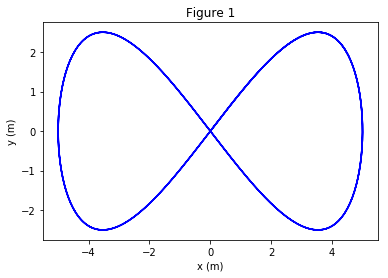

In [9]:
while t<20:
    ta.append(t)
    xn.append(y0[0]) #numerical x position
    yn.append(y0[1]) #numerical y position

    ####### Solver #######
    y1 = RK4(lissajous, y0, t, h)


    for i in range(len(y1)): #reset y0 to the new vector
        y0[i] = y1[i]

    t = t + h #update clock

#plot Lissajour Figure
plt.figure()
plt.title('Figure 1')
plt.plot(xn,yn, 'b-') 
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


The above graph is the result of our chosen initial conditions and constants. This graphs changes drastically depending on what initial conditions, consntants, and the angular frequency ratio $\frac{\omega_1}{\omega_2}$. Lets take a look at what happens if we change some of these variables.

Lets first change our angular frequency ratio to $\frac{3}{4}$

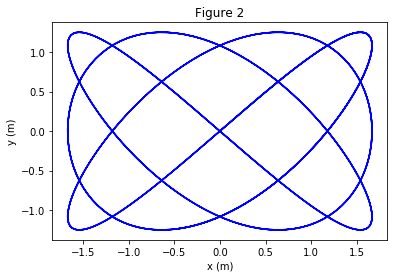

In [10]:
#constants
m = 1   # kg
w1 = 3  # angular frequency of x (rad/s)
w2 = 4  # angular frequency of y (rad/s)
t = 0.0   #time (s)
h = 0.02  #time step (s)


y0 = [rx0, ry0, vx0, vy0] #initial x position, initial y position, initial x velocity, initial y velocity
ta, xn, yn = [],[],[] #lists to store time, numerical x-position, numerical y-position


#initial conditions
rx0 = 0   #initial x-position (m)
ry0 = 0   #initial y-position (m)
vx0 = 5   #initial x-velocity (m/s)
vy0 = 5   #initial y-velocity (m/s)

while t<20:
    ta.append(t)
    xn.append(y0[0]) #numerical x position
    yn.append(y0[1]) #numerical y position

    ####### Solver #######
    y1 = RK4(lissajous, y0, t, h)


    for i in range(len(y1)): #reset y0 to the new vector
        y0[i] = y1[i]

    t = t + h #update clock

#plot Lissajour Figure    
plt.figure()
plt.title('Figure 2')
plt.plot(xn,yn, 'b-') #label='numerical solution for path')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.show()


As you can see, figure 2 looks a little bit different than the figure 1. The number of crests along the x-axis tells you the value of $\omega_2$ and along the y-axis tells you the value of $\omega_1$. Since you can see 4 crests along the x-axis and 3 along the y-axis, you know that the angular frequency ratio $\frac{\omega_1}{\omega_2} = \frac{3}{4}$



Now lets look at the grap with an angular frequency ratio of $\frac{1}{3}$

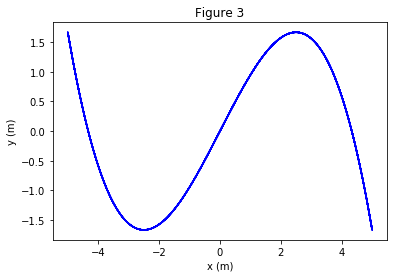

In [11]:
#constants
m = 1   # kg
w1 = 1  # angular frequency of x (rad/s)
w2 = 3  # angular frequency of y (rad/s)
t = 0.0   #time (s)
h = 0.02  #time step (s)


y0 = [rx0, ry0, vx0, vy0] #initial x position, initial y position, initial x velocity, initial y velocity
ta, xn, yn = [],[],[] #lists to store time, numerical x-position, numerical y-position


#initial conditions
rx0 = 0   #initial x-position (m)
ry0 = 0   #initial y-position (m)
vx0 = 5   #initial x-velocity (m/s)
vy0 = 5   #initial y-velocity (m/s)

while t<20:
    ta.append(t)
    xn.append(y0[0]) #numerical x position
    yn.append(y0[1]) #numerical y position

    ####### Solver #######
    y1 = RK4(lissajous, y0, t, h)


    for i in range(len(y1)): #reset y0 to the new vector
        y0[i] = y1[i]

    t = t + h #update clock

#plot Lissajour Figure
plt.figure()
plt.title('Figure 3')
plt.plot(xn,yn, 'b-') #label='numerical solution for path')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.legend()
plt.show()


As you have probably noticed,this graph looks different than the first two. The way to know what the angular frequency ratio 
is from this graph is to first look at the crests and traughs and see what direction they are in. Since they are along the along the x-direction we know that this corresponds to $\omega_2$. To know what number $\omega_2$ is, you count the number of crests and traughs and then add 1. In the above imagem since there is 1 crest and 1 traugh, we know that $\omega_2 = 3$. Additionally, since there are no crests or traughs along the x-direction, we know that $\omega_1 = 1$.

Now lets try changing the initial velocities. To make a mental picture of what you think will happen if we have an initial x-velocity of 0 and an initial y-velocity of 1, lets think about it as the box with the mass and the 4 spring attached as mentioned previously. if we pull the mass back in the $y$ direction only, then we would expect there to be a single vertical like in the graph. Lets try it and see what happens...

##### (side note --> run the following cell twice (hit shift enter, and then click the cell once more and hit shift enter again) when running the following cell to make sure all variables and lists are updated so you will get the correct graph)

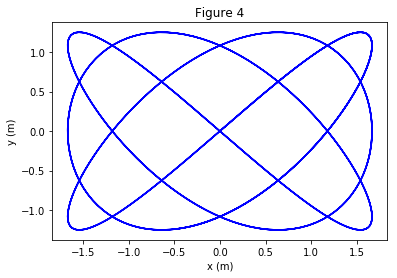

In [12]:
#constants
m = 1   # kg
w1 = 3  # angular frequency of x (rad/s)
w2 = 4  # angular frequency of y (rad/s)
t = 0.0   #time (s)
h = 0.02  #time step (s)


y0 = [rx0, ry0, vx0, vy0] #initial x position, initial y position, initial x velocity, initial y velocity
ta, xn, yn = [],[],[] #lists to store time, numerical x-position, numerical y-position


#initial conditions
rx0 = 0   #initial x-position (m)
ry0 = 0   #initial y-position (m)
vx0 = 0   #initial x-velocity (m/s)
vy0 = 1   #initial y-velocity (m/s)

while t<20:
    ta.append(t)
    xn.append(y0[0]) #numerical x position
    yn.append(y0[1]) #numerical y position

    ####### Solver #######
    y1 = RK4(lissajous, y0, t, h)


    for i in range(len(y1)): #reset y0 to the new vector
        y0[i] = y1[i]

    t = t + h #update clock

#plot Lissajour Figure
plt.figure()
plt.title('Figure 4')
plt.plot(xn,yn, 'b-') #label='numerical solution for path')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
#plt.legend()
plt.show()


As you can see, our prediction was correct. We have the mass moving in the y-direction only. If you pulled the mass back in the x-direction only, then you would have a single horizontal line. 

You have now learned about how Lissajous Figures operate, Great Job!! Feel free to go back through and play around with the initial conditions and constants to created some more interesting shapes/designes!